# Model Evaluation 

Evaluating the machine learning model and inherently the development pipeline is an essential part of any **learning** project. There are two perspectives:

* Verifying and validating the learning approach/pipeline/model
* Deploying the ML model

Verifying the model always involves a training and testing dataset and frequently a validation dataset.

1. The training, testing, and validation datasets are drawn from the same main dataset. Thus any underlying probabilistic distribution of the collected and preprocessed dataset is assumed to apply to all these three pieces.
2. Training dataset is used to develop the model. Training dataset is generally non-overlapping, or in other words, samples are drawn without replacement.
3. Validation dataset is used to fine-tune the model. Grid search model parameters and pick the best performance based on the validation performance only. Then the testing dataset is used to actually measure the trained and tuned model. If a model does not need a validation dataset (i.e. no parameters to tune, such as Naive Bayes), then we can add the validation dataset to the training dataset.
4. Testing dataset is used to verify and evaluate the model performance.

**Important:** Though evaluation is about measuring the performance, it is also setting the details of the model development pipeline in such a way that the exact pipeline will also be used for the **product** development or deployment.

Note that through model evaluation we are making sure that what we have done as model development is correct. If there is a next project step where we **deploy** the model in a computer system (in fact it would be our actual product), so that our developed model would actually predict something, then the most common approach is using the entire dataset to train and develop the model, exactly as the evaluation pipeline is constructed. Then a possible overall approach would be use train/test/validate to build and verify the pipeline, and compute some metrics so that we can scholarly show that the developed model actually learned something and performs better than a **random** classifier.

**Question:** If there are 5 target classes, then what is the lower-bound accuracy a random classifier would achieve?

Model evaluation answers a few questions:

* Classification - What is the expected accuracy a model would achieve when given unseen data points and asked to predict?
* Classification - What is the expected accuracy of individual classes and confusion between them (i.e. when the class A is truth for a particular data point, is class B is predicted, or class C is predicted?)
* Regression - What is the total error between the regression curve (simplified model, fitted curve, etc.) and the actual data points?
* If we are OK with a particular False-Alarm-Rate, then what is the highest accuracy we can achieve? For example, based on Receiver Operating Characteristic (ROC) curve what should be our operating point.
* What is the variation of the classification error?
* Can we estimate the model generalization?

## Model Evaluation Methods

**Training-testing-validation:** Common approach. In our project, we have to come up with a suitable training-testing-validation dataset. A good example can be as in the following: Given 20 year long dataset where we know the data is collected every day for 20 years, the training dataset can use all those 20 years. The validation dataset can use all 20 years but a percentage portion of the training (e.g. 10%). The testing dataset can be drawn from the last 5 years. Assuming the unseen data would be somewhat closer to the recent years. This kind of decisions are to be made by the model developer working with the subject matter experts.

**K-fold cross validation:** Common approach. Parameter tuning is not done but parameters are fixed throughout the entire development and evaluation. Each fold has non-overlapping test and train datasets. Average the computed accuracies for each fold and report as the accuracy. Clearly, a ML method with **good generalization** and rather **insensitive to model parameters** would work much better with this evaluation model.

**Leave-one-out-cross-validation (LOOCV):** Seldom used. Similar to k-fold cross validation but testing dataset is always a single point. Recommended for very small datasets or when several outlier data points exist in the set and they are to be learned by the model.

**Stratification:** When target categories are unbalanced (e.g. there are more benign cases rather than malignant), then a correct validation requires the training/test datasets, or folds, preserving the percentage of samples for each class. sklearn library supports stratification fully, such as by the use of StratifiedKFold library function.

The **most important aspect** of model evaluation is measuring the **expected** real-world performance with a good generalization.

# Generalization

The developed model's ability to adapt (not a real adaptation but more like being ready) properly to new, previously unseen data, drawn from the same probabilistic distribution as the one used to create the model. Some classifiers which have good generalization ability:

* Support Vector Machines (large-margin) classifiers, since they solve an optimization problem to maximize the distance between data points and the decision (discrimination) surface.
* Random Forest (ensemble) classifiers, since they use few features per classifier, but numerous simple classifiers which randomly employ features, and then take the majority of the predictions made by this ensemble of classifiers.
* Principal Component Analysis (PCA) for unsupervised learning, since they try to find simplified data representation by looking at the largest eigenvalues of the covariance matrix of features.
* Human beings 😃

## Evaluation Metrics

Following is a list of evaluation metrics.

1. Classification Accuracy
This the major metric we will use.

Accuracy =  𝚗𝚞𝚖𝚋𝚎𝚛 𝚘𝚏 𝚌𝚘𝚛𝚛𝚎𝚌𝚝 𝚙𝚛𝚎𝚍𝚒𝚌𝚝𝚒𝚘𝚗𝚜𝚝𝚘𝚝𝚊𝚕 𝚗𝚞𝚖𝚋𝚎𝚛 𝚘𝚏 𝚙𝚛𝚎𝚍𝚒𝚌𝚝𝚒𝚘𝚗𝚜

2. Confusion Matrix¶
This is the second major metric and it is defined for binary classification.

N=33	truth A	truth B
predicted A	10	3	
predicted B	1	20	
Historically from statistics, a positive and a negative class is defined, such as patient has cancer is positive, and does not have is negative. Assume class A is positive and class B is negative.

Type I error - missing the positive, mis-predict class A - patient has cancer and missed.
Type II error - patient does not have cancer but misdiagnosed - False Alarm.

Type I errors are very costly.

True Positive (TP) = Predicted A, truth is A
True Negative (TN) = Predicted B, truth is B
False Positive (FP) = Predicted A, truth is B - Type II error
False Negative (FN) = Predicted B, truth is A - Type I error - major mistake

---

**Example:** TP=10, TN=20, FP=3, FN=1

Accuracy =  𝚃𝙿+𝚃𝙽𝚃𝙿+𝚃𝙽+𝙵𝙿+𝙵𝙽=10+2010+20+3+1 
TP Rate (TPR) =  𝚃𝙿∑𝚝𝚛𝚞𝚝𝚑 𝚙𝚘𝚜𝚒𝚝𝚒𝚟𝚎=1010+1 
TN Rate (TNR) =  𝚃𝙽∑𝚝𝚛𝚞𝚝𝚑 𝚗𝚎𝚐𝚊𝚝𝚒𝚟𝚎=2020+3

---

Also from Information Retrieval, following metrics are defined,

Precision =  𝚃𝙿𝚃𝙿+𝙵𝙿  How many selected items are relevant?

Recall =  𝚃𝙿𝚃𝙿+𝙵𝙽  How many relevant items are selected?

3. F1-score
Also known as harmonic mean of precision and recall.

F-1 score =  2Precision×RecallPrecision+Recall 
F score attempts to find a balance between precision and recall

4. Area Under Curve (AUC)
Also known as area under Receiver Operating Characteristic (ROC) curve.

It is used for binary classification problem. AUC of a classifier is equal to the probability that the classifier will rank a randomly chosen positive example higher than a randomly chosen negative example.

5. Mean Absolute Error
(MAE) is the average error between the original  𝑥𝑖  and the predicted  𝑥̂ 𝑖  values for regression problems.

MAE =  1𝑁∑𝑖=1𝑁|𝑥𝑖−𝑥̂ 𝑖|

6. Mean Squared Error (MSE)
MSE is similar to MAE and is more common than MAE.

MSE =  1𝑁∑𝑖=1𝑁(𝑥𝑖−𝑥̂ 𝑖)2 
7. Logarithmic Loss
Also known as Log Loss measures false classifications and suitable for multi-class classification (rather less common error metric).

LogLoss =  −1𝑁∑𝑖=1𝑁∑𝑗=1𝑀𝑦𝑖𝑗log(𝑝𝑖𝑗) 
𝑦𝑖𝑗  indicates whether sample  𝑖  belongs to class  𝑗  or not
𝑝𝑖𝑗  indicates the probability (or score) of sample  𝑖  belonging to class  𝑗 
LogLoss has no upper bound and it exists on the range  [0,∞) . Log Loss measure close to 0 indicates a higher accuracy. In general, minimizing LogLoss gives greater accuracy for the classifier.

## Receiver Operating Characteristic Curve
The ROC curve is composed of true positive rate (TPR) on the y-axis and the false positive rate (FPR) on the x-axis while each operating point corresponds to some detection threshold or a classifier model parameter.

The best possible prediction method would yield a point in the upper left corner or coordinate (0,1) of the ROC space, representing zero false negatives and zero false positives, and perfect prediction. A random guess or a coin flip would result a point along the diagonal line (also called line of no-discrimination) from the left bottom to the top right corners (regardless of the positive and negative base rates).

ROC can be used for both model evaluation (such as the area under the ROC curve, presents the model behavior with different parameters) and, or deciding on a model parameter for deployment, i.e. setting the TPR with a given accepted false alarm rate. ROC is used to make a model selection or set an operating classifier threshold by considering the TPR-FPR together. Generally, ROC is used for binary classification.

An example ROC curve is generated in cells below using breast cancer data from sklearn.datasets.

1% malicious vs. 99% begin

Classifer = Always predict benign

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Locate and load the data file
bc = load_breast_cancer()
bc_df = pd.DataFrame(data= np.c_[bc.data, [bc.target_names[v] for v in bc.target]],
                     columns= list(bc.feature_names)+['cancer'])
# See how the data looks like
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,malignant
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902,malignant
2,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,...,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,malignant
4,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,...,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678,malignant


In [2]:
# Populate the dataset, cancer column is target variable
X = bc_df.loc[:, bc_df.columns != 'cancer'].values
y = bc_df.loc[:, bc_df.columns == 'cancer'].values.ravel()

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Display OP
def annot(opi, x, y):
    plt.annotate(f"OP{opi}", xy=(x, y), xytext=(.90*x+.1, .80*y), arrowprops=dict(facecolor='lightgray', shrink=1))

# Training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.98, random_state=14)

# Parameter to vary for Logistic Regression
C = (2e-1, 0.5, 0.8, 1, 2, 5, 1e1, 2e1, 1e2)

# Let's vary C and generate training/testing sessions to collect data for ROC
FPR, TPR = [], []
for c in C:
    pipe_lr = make_pipeline(StandardScaler(),
                            LogisticRegression(random_state=14,
                                               penalty='l1',
                                               solver='liblinear',
                                               class_weight='balanced',
                                               C=c,
                                               multi_class='auto',
                                               max_iter=10000))
    pipe_lr.fit(X_train, y_train)
    y_pred = pipe_lr.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp/(tp+fn)]  # Pd
    FPR += [fp/(fp+tn)]  # Pf
    #
    print(f'Test Accuracy= {pipe_lr.score(X_test, y_test):.3f}, C={c:13.5f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 0.803, C=      0.20000, TPR 0.938, FPR 0.280
Test Accuracy= 0.860, C=      0.50000, TPR 0.948, FPR 0.193
Test Accuracy= 0.912, C=      0.80000, TPR 0.839, FPR 0.043
Test Accuracy= 0.896, C=      1.00000, TPR 0.777, FPR 0.032
Test Accuracy= 0.866, C=      2.00000, TPR 0.682, FPR 0.023
Test Accuracy= 0.837, C=      5.00000, TPR 0.602, FPR 0.020
Test Accuracy= 0.823, C=     10.00000, TPR 0.559, FPR 0.017
Test Accuracy= 0.814, C=     20.00000, TPR 0.531, FPR 0.014
Test Accuracy= 0.794, C=    100.00000, TPR 0.460, FPR 0.003


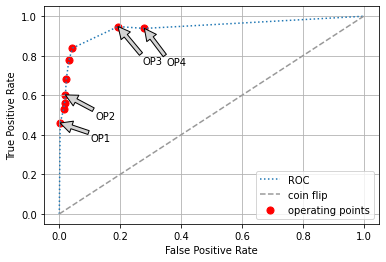

In [4]:
# Sorts the points to display nicely on ROC
FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Annotate certain operating points
annot(1, fpr[1], tpr[1])
annot(2, fpr[4], tpr[4])
annot(3, fpr[8], tpr[8])
annot(4, fpr[9], tpr[9])

# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

**Dramatization:** Note that in order to generate a nice ROC for demonstration purposes, we selected a harsh test size of 98% and random_state=14. Also picked LogisticRegression with parameters penalty='l1', solver='liblinear'. Not every classifier generates an ROC curve like above due to non-existence of a parameter that can vary detection versus false alarm smoothly.

**Important Question:** Given above ROC, which operating point would you pick for cancer detection? OP1, OP2, OP3, or OP4?

---

## Generalization Error
From statistical learning theory, the generalization error is the difference between the expected and empirical error. Or, the difference between error on the training set and error on the underlying joint probability distribution.

Question: If we know the underlying joint probability distribution of the data, then would we need an ML method?

Answer: No. We will probably never be able to know the underlying data probability distribution for practical ML problems.

---

Student: Below cell can be safely ignored. This is the code to display tables left oriented in this notebook.

In [5]:
%%html
<style>
    table {margin-left: 0 !important;}
</style>